## Create a file structure with original images

In [1]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import pickle
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
images_data = []  # Una lista para almacenar temporalmente los datos de las imágenes originales

# Directory path where the images are located
# directory = "../archive"
directory = "../archive_balanced"

# Iterate over the images in the directory
for dirname, _, filenames in os.walk(directory):
    # Extract the subdirectory name
    subdirectory_name = os.path.basename(dirname)
    print("Reading", subdirectory_name)
    for filename in filenames:
        image_path = os.path.join(dirname, filename)
        image = Image.open(image_path)
        image = image.convert('RGB')
        images_data.append((image, subdirectory_name))  # Almacenar temporalmente la imagen y su etiqueta

Reading archive_balanced
Reading Black-grass
Reading Charlock
Reading Cleavers
Reading Common Chickweed
Reading Common wheat
Reading Fat Hen
Reading Loose Silky-bent
Reading Maize
Reading Scentless Mayweed
Reading Shepherd Purse
Reading Small-flowered Cranesbill
Reading Sugar beet


In [4]:
# Guardar images_data/images_data_balanced en un archivo usando pickle
#with open('../images_data.pkl', 'wb') as f:
with open('../images_data_balanced.pkl', 'wb') as f:
    pickle.dump(images_data, f)

In [5]:
# ruta = "/content/drive/MyDrive/Colab Notebooks/"
ruta = "../"

# Load data
import pickle
ruta_completa = os.path.join(ruta, 'images_data_balanced.pkl')
with open(ruta_completa, 'rb') as f:
    images_data = pickle.load(f)

In [6]:
#ruta_train = "Train_original"
#ruta_test  = "Test_original"
ruta_train = "Train_original_balanced"
ruta_test  = "Test_original_balanced"

X = []
Y = []
for image, label in images_data:
    X.append(np.array(image))
    Y.append(label)


os.makedirs(os.path.join(ruta, ruta_train), exist_ok=True)
os.makedirs(os.path.join(ruta, ruta_test), exist_ok=True)

# Get all unique categories
unique_categories = set(Y)
# Create a mapping from category name to integer label
category_to_label = {category: label for label, category in enumerate(unique_categories)}
categories = category_to_label.keys()  # Lista de categorías
Y = [category_to_label[category] for category in Y]

X = np.array(X)
Y = np.array(Y)

for category in categories:
    train_dir = os.path.join(ruta, ruta_train, category)
    test_dir = os.path.join(ruta, ruta_test, category)
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

for category in categories:
    label = category_to_label[category]
    category_images = X[Y == label]
    category_train, category_test = train_test_split(category_images, test_size=0.2, random_state=42)

    print("Working on", category)
    # Counter
    train_counter = 1
    test_counter = 1

    for image in category_train:
        # Transform image to image_array
        image_array = np.array(image)

        # Save image_array as an image
        dest_path = os.path.join(ruta, ruta_train, category, f"image{train_counter}.jpg")
        image_to_save = Image.fromarray(image_array)
        image_to_save.save(dest_path)
        
        train_counter += 1

    for image in category_test:
        # Transform image to image_array
        image_array = np.array(image)

        # Save image_array as an image
        dest_path = os.path.join(ruta, ruta_test, category, f"image{test_counter}.jpg")
        image_to_save = Image.fromarray(image_array)
        image_to_save.save(dest_path)
        
        test_counter += 1

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15928\3112802537.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


Working on Loose Silky-bent
Working on Common Chickweed
Working on Maize
Working on Sugar beet
Working on Fat Hen
Working on Common wheat
Working on Charlock
Working on Black-grass
Working on Cleavers
Working on Shepherd Purse
Working on Small-flowered Cranesbill
Working on Scentless Mayweed


## Here is all done. Next code is just to see how good the augmented data would look like

In [7]:
train_data_generator = ImageDataGenerator(
        preprocessing_function = preprocess_input, # normalizacion, Reordenamiento de Canales...
        # data augmentation
        rotation_range = 10,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        zoom_range = 0.4, # zoom 1.1 caused huge distortion!!! ====> with 0.4 OK
        horizontal_flip = True
        )

test_data_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input)

In [8]:
# Image Data Generator: Converts images into tensors.

train_data_generator = ImageDataGenerator(
                                           preprocessing_function = preprocess_input, # normalizacion, Reordenamiento de Canales...
                                           rescale = 1./255,
                                           horizontal_flip= True,
                                           rotation_range=100,
                                           width_shift_range=0.2, 
                                           height_shift_range = 0.2,
                                           shear_range = 0.6, 
                                           zoom_range = 0.4,
                                           dtype='float32')
                                                 
test_data_generator = ImageDataGenerator(rescale = 1./255)

In [9]:
batch_size = 64

train_generator = train_data_generator.flow_from_directory(directory=os.path.join(ruta, ruta_train),
                                                           class_mode ="sparse",
                                                          target_size = (224 , 224),
                                                          batch_size = batch_size)

test_generator = test_data_generator.flow_from_directory(directory=os.path.join(ruta, ruta_test),
                                                         class_mode ="sparse",
                                                        target_size = (224 , 224),
                                                        batch_size = batch_size)

Found 7308 images belonging to 12 classes.
Found 1836 images belonging to 12 classes.


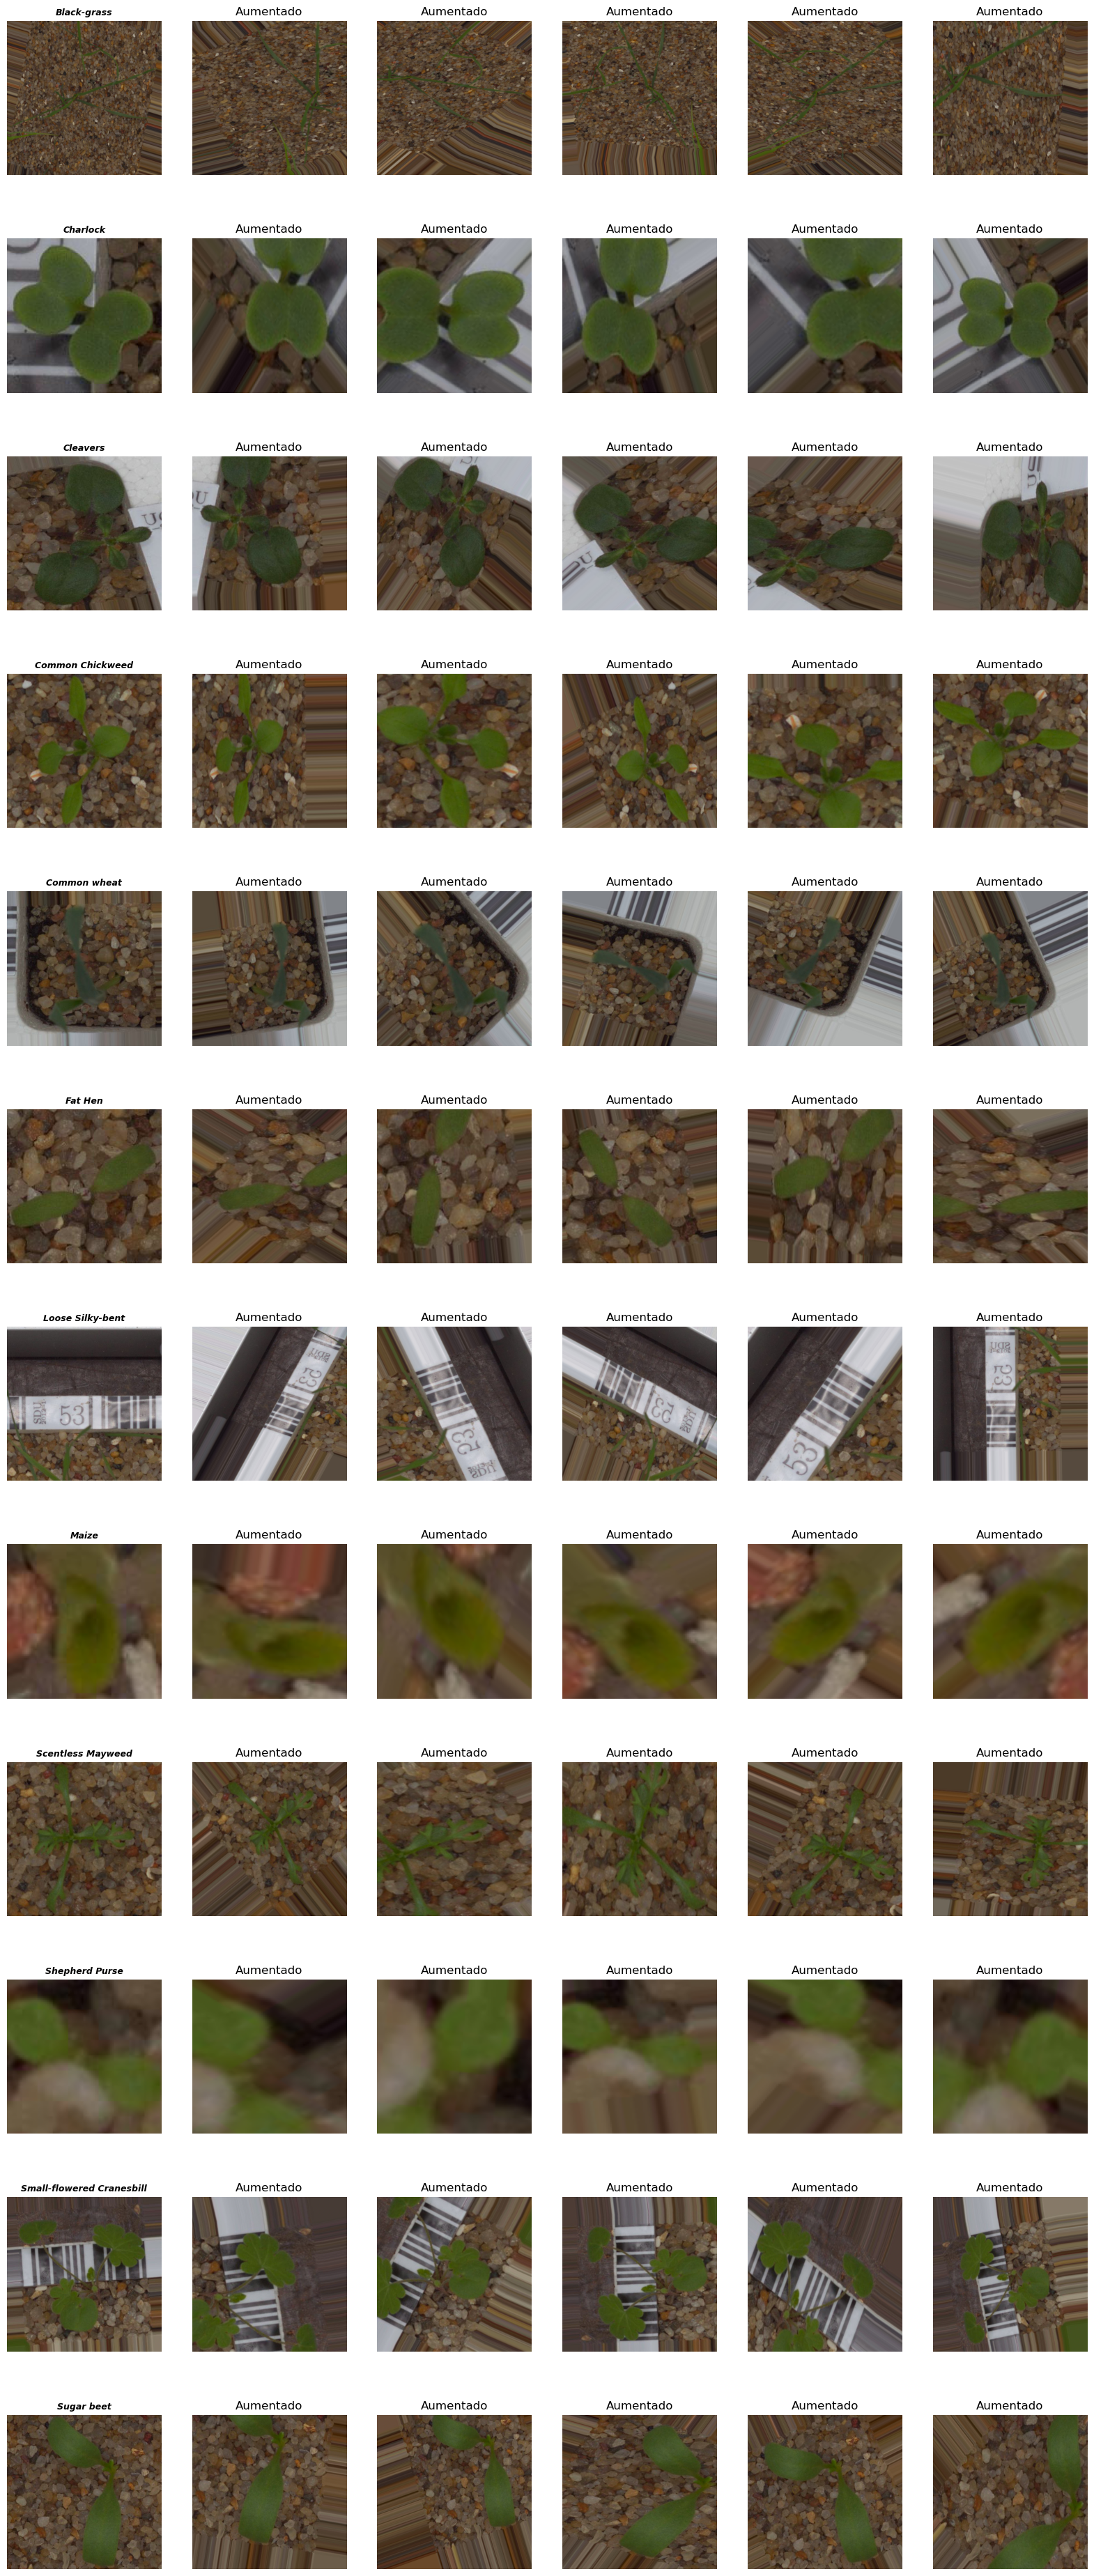

In [10]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import os

def random_index(x, num_of_samples):
    indices = np.random.choice(num_of_samples, size=x, replace=False)
    return indices


# Visualization of multiple data augmentation results.
fig, ax = plt.subplots(12, 6, figsize=(20, 48))

# List of clases
class_directories = sorted(os.listdir(train_generator.directory))

i = 0
for directory in class_directories:
    class_path = os.path.join(train_generator.directory, directory)
    num_of_samples = len(os.listdir(class_path))
    indice = random_index(1, num_of_samples)
  
    image_files = [f for f in os.listdir(class_path) if f.endswith('.jpg') or f.endswith('.png')]
    image_path = os.path.join(class_path, image_files[indice[0]])
    ax[i, 0].imshow(io.imread(image_path))
    ax[i, 0].set_title(directory, fontstyle="italic", fontweight='bold', fontsize=9)
    ax[i, 0].axis("off")

    for j in range (1,6):
        ax[i, j].imshow(train_data_generator.random_transform(io.imread(image_path)))
        ax[i, j].set_title("Aumentado")
        ax[i, j].axis("off")
    i += 1